In [8]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from google.colab import files
import os

# define the file name
file_name = 'PartA-Dataset_C.csv'

# check the file from server
if not os.path.exists(file_name):
    # if the file not exist, prompt file upload
    print(f"Please upload the file:")
    uploaded = files.upload()

    file_name = list(uploaded.keys())[0]

# load the dataset
data = pd.read_csv(file_name)

# group the data with member_number, date and itemDescription
transaction_data = data.groupby(['Member_number', 'Date'])['itemDescription'].agg(list).reset_index()

# transform the data with TransactionEncoder
te = TransactionEncoder()
transaction_array = te.fit(transaction_data['itemDescription']).transform(transaction_data['itemDescription'])
item_df = pd.DataFrame(transaction_array, columns=te.columns_)

# apply the apriori
frequent_itemsets = apriori(item_df, min_support=0.001, use_colnames=True)

# generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold = 0.05, num_itemsets=None)

# display association rules
print("Association Rules:")
print(rules)

# get interesting rules
interesting_rules = rules[(rules['lift'] > 0.8) & (rules['confidence'] > 0.05)]

# display interesting rules
print("\nInteresting Association Rules:")
print(interesting_rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Association Rules:
                antecedents         consequents  antecedent support  \
0             (brown bread)        (rolls/buns)            0.022547   
1             (brown bread)        (whole milk)            0.022547   
2                  (butter)        (whole milk)            0.023048   
3                    (curd)              (soda)            0.021115   
4                    (curd)        (whole milk)            0.021115   
5           (domestic eggs)  (other vegetables)            0.019755   
6           (domestic eggs)        (whole milk)            0.019755   
7   (fruit/vegetable juice)        (whole milk)            0.017178   
8              (rolls/buns)  (other vegetables)            0.067425   
9           (shopping bags)  (other vegetables)            0.020256   
10                 (pastry)        (whole milk)            0.029132   
11          (shopping bags)        (whole milk)            0.020256   

    consequent support   support  confidence      lift  r

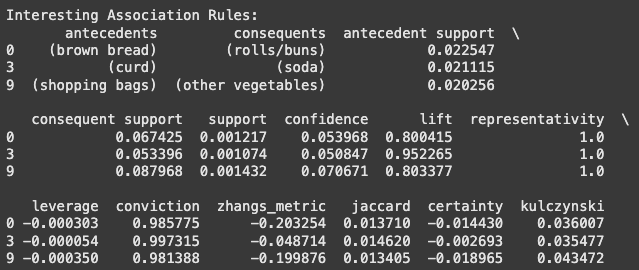

Support: 0.001,
Confidence: 0.05,
Lift: 0.8

# Findings and Interpretation:
**1. Brown bread and rolls/bun**
- Insight: This association shows that there is a 5.4% chance that a customer will buy brown bread and rolls/bun together.
- Recommendation: It is suggested to provide a promotion bundle for these 2 items together to increase sales.


**2. Curd and soda**
- Insight: If a curd is bought, there is around 5.1% that soda will be bought too.
- Recommendation: Store owner can place these 2 items near to each other or in the same area, as there are a similar category.


**3. Shopping bags and other vegetables**
- Insight: There is a 7.1% probability that customer will purchase vegetable with shopping bags.
- Recommendation: Considering placing the shopping bags near the vegetable section, because customer can put their vegetables into the bag directly for easy carry